#Download the Data

In [ ]:
# Install Kaggle API
!pip install --quiet kaggle

In [ ]:
# Choose kaggle.json that created for new API token in your account
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"zahraelhamraoui565","key":"4715fbd449edea80c3947f3bf0b94578"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# Check the file in its new directory
!ls /root/.kaggle/
# Check the file permission
!ls -l ~/.kaggle/kaggle.json
#Change the file permission
# chmod 600 file – owner can read and write
# chmod 700 file – owner can read, write and execute
!chmod 600 ~/.kaggle/kaggle.json

kaggle.json
-rw-r--r-- 1 root root 74 Jul 24 23:02 /root/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d nphantawee/pump-sensor-data

 54% 20.0M/37.1M [00:00<00:00, 49.0MB/s]
100% 37.1M/37.1M [00:00<00:00, 83.6MB/s]


In [ ]:
from zipfile import ZipFile
file_name = '/content/pump-sensor-data.zip'

with ZipFile (file_name, 'r') as zip : 
  zip.extractall()
  print('done')


done


In [ ]:
# Import Dependencies
%matplotlib inline
import time


# Data Manipulation
import numpy as np
import pandas as pd
# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')


#Encoding 
from sklearn.preprocessing import LabelEncoder



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data = pd.read_csv('/content/sensor.csv')
data.head()

,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32,sensor_33,sensor_34,sensor_35,sensor_36,sensor_37,sensor_38,sensor_39,sensor_40,sensor_41,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,37.22740,47.52422,31.11716,1.681353,419.5747,NaN,461.8781,466.3284,2.565284,665.3993,398.9862,880.0001,498.8926,975.9409,627.6740,741.7151,848.0708,429.0377,785.1935,684.9443,594.4445,682.8125,680.4416,433.7037,171.9375,341.9039,195.0655,90.32386,40.36458,31.51042,70.57291,30.98958,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,37.22740,47.52422,31.11716,1.681353,419.5747,NaN,461.8781,466.3284,2.565284,665.3993,398.9862,880.0001,498.8926,975.9409,627.6740,741.7151,848.0708,429.0377,785.1935,684.9443,594.4445,682.8125,680.4416,433.7037,171.9375,341.9039,195.0655,90.32386,40.36458,31.51042,70.57291,30.98958,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,15.01013,37.86777,48.17723,32.08894,1.708474,420.8480,NaN,462.7798,459.6364,2.500062,666.2234,399.9418,880.4237,501.3617,982.7342,631.1326,740.8031,849.8997,454.2390,778.5734,715.6266,661.5740,721.8750,694.7721,441.2635,169.9820,343.1955,200.9694,93.90508,41.40625,31.25000,69.53125,30.46875,31.770830,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,15.08247,38.57977,48.65607,31.67221,1.579427,420.7494,NaN,462.8980,460.8858,2.509521,666.0114,399.1046,878.8917,499.0430,977.7520,625.4076,739.2722,847.7579,474.8731,779.5091,690.4011,686.1111,754.6875,683.3831,446.2493,166.4987,343.9586,193.1689,101.04060,41.92708,31.51042,72.13541,30.46875,31.510420,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,15.08247,39.48939,49.06298,31.95202,1.683831,419.8926,NaN,461.4906,468.2206,2.604785,663.2111,400.5426,882.5874,498.5383,979.5755,627.1830,737.6033,846.9182,408.8159,785.2307,704.6937,631.4814,766.1458,702.4431,433.9081,164.7498,339.9630,193.8770,101.70380,42.70833,31.51042,76.82291,30.98958,31.510420,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220319 entries, 1 to 220319
Data columns (total 53 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   timestamp       220319 non-null  object 
 1   sensor_00       220319 non-null  float64
 2   sensor_01       220319 non-null  float64
 3   sensor_02       220319 non-null  float64
 4   sensor_03       220319 non-null  float64
 5   sensor_04       220319 non-null  float64
 6   sensor_05       220319 non-null  float64
 7   sensor_06       220319 non-null  float64
 8   sensor_07       220319 non-null  float64
 9   sensor_08       220319 non-null  float64
 10  sensor_09       220319 non-null  float64
 11  sensor_10       220319 non-null  float64
 12  sensor_11       220319 non-null  float64
 13  sensor_12       220319 non-null  float64
 14  sensor_13       220319 non-null  float64
 15  sensor_14       220319 non-null  float64
 16  sensor_16       220319 non-null  float64
 17  sensor_17 

In [ ]:
data.describe()

,Unnamed: 0,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32,sensor_33,sensor_34,sensor_35,sensor_36,sensor_37,sensor_38,sensor_39,sensor_40,sensor_41,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51
count,220320.000000,210112.000000,219951.000000,220301.000000,220301.000000,220301.000000,220301.000000,215522.000000,214869.000000,215213.000000,215725.000000,220301.000000,220301.000000,220301.000000,220301.000000,220299.000000,0.0,220289.000000,220274.000000,220274.000000,220304.000000,220304.000000,220304.000000,220279.000000,220304.000000,220304.000000,220284.000000,220300.000000,220304.000000,220304.000000,220248.000000,220059.000000,220304.00000,220252.000000,220304.000000,220304.000000,220304.000000,220304.000000,220304.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,143303.000000,204937.000000
mean,110159.500000,2.372221,47.591611,50.867392,43.752481,590.673936,73.396414,13.501537,15.843152,15.200721,14.799210,41.470339,41.918319,29.136975,7.078858,376.860041,NaN,416.472892,421.127517,2.303785,590.829775,360.805165,796.225942,459.792815,922.609264,556.235397,649.144799,786.411781,501.506589,851.690339,576.195305,614.596442,863.32310,804.283915,486.405980,234.971776,427.129817,593.033876,60.787360,49.655946,36.610444,68.844530,35.365126,35.453455,43.879591,42.656877,43.094984,48.018585,44.340903,150.889044,57.119968,183.049260,202.699667
std,63601.049991,0.412227,3.296666,3.666820,2.418887,144.023912,17.298247,2.163736,2.201155,2.037390,2.091963,12.093519,13.056425,10.113935,6.901755,113.206382,NaN,126.072642,129.156175,0.765883,199.345820,101.974118,226.679317,154.528337,291.835280,182.297979,220.865166,246.663608,169.823173,313.074032,225.764091,195.726872,283.54476,260.602361,150.751836,88.376065,141.772519,289.385511,37.604883,10.540397,15.613723,21.371139,7.898665,10.259521,11.044404,11.576355,12.837520,15.641284,10.442437,82.244957,19.143598,65.258650,109.588607
min,0.000000,0.000000,0.000000,33.159720,31.640620,2.798032,0.000000,0.014468,0.000000,0.028935,0.000000,0.000000,0.000000,0.000000,0.000000,32.409550,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,95.527660,0.000000,0.000000,0.000000,0.000000,43.154790,0.000000,4.319347,0.636574,0.000000,23.95833,0.240716,6.460602,54.882370,0.000000,2.260970,0.000000,24.479166,19.270830,23.437500,20.833330,22.135416,24.479166,25.752316,26.331018,26.331018,27.199070,26.331018,26.620370,27.488426,27.777779
25%,55079.750000,2.438831,46.310760,50.390620,42.838539,626.620400,69.976260,13.346350,15.907120,15.183740,15.053530,40.705260,38.856420,28.686810,1.538516,418.103250,NaN,459.453400,454.138825,2.447542,662.768975,398.021500,875.464400,478.962600,950.922400,601.151050,693.957800,790.489575,448.297950,782.682625,518.947225,627.777800,839.06240,760.607475,489.761075,172.486300,353.176625,288.547575,28.799220,45.572910,32.552080,57.812500,32.552080,32.812500,39.583330,36.747684,36.747684,40.509258,39.062500,83.912030,47.743060,167.534700,179.108800
50%,110159.500000,2.456539,48.133678,51.649300,44.227428,632.638916,75.576790,13.642940,16.167530,15.494790,15.082470,44.291340,45.363140,32.515830,2.929809,420.106200,NaN,462.856100,462.020250,2.533704,665.672400,399.367000,879.697600,531.855900,981.925000,625.873500,740.203500,861.869600,494.468450,967.279850,564.872500,668.981400,917.70830,878.850750,512.271750,226.356050,473.349350,709.668050,64.295485,49.479160,35.416660,66.406250,34.895832,35.156250,42.968750,40.509260,40.219910,44.849540,42.534720,138.020800,52.662040,193.865700,197.338000
75%,165239.250000,2.499826,49.479160

In [ ]:
data.dtypes

Unnamed: 0          int64
timestamp          object
sensor_00         float64
sensor_01         float64
sensor_02         float64
sensor_03         float64
sensor_04         float64
sensor_05         float64
sensor_06         float64
sensor_07         float64
sensor_08         float64
sensor_09         float64
sensor_10         float64
sensor_11         float64
sensor_12         float64
sensor_13         float64
sensor_14         float64
sensor_15         float64
sensor_16         float64
sensor_17         float64
sensor_18         float64
sensor_19         float64
sensor_20         float64
sensor_21         float64
sensor_22         float64
sensor_23         float64
sensor_24         float64
sensor_25         float64
sensor_26         float64
sensor_27         float64
sensor_28         float64
sensor_29         float64
sensor_30         float64
sensor_31         float64
sensor_32         float64
sensor_33         float64
sensor_34         float64
sensor_35         float64
sensor_36   

Let's inspect now Machine Status

In [ ]:
# machine status
data['machine_status'].unique()#'NORMAL', 'BROKEN', 'RECOVERING' 
data['machine_status'].value_counts()

NORMAL        205836
RECOVERING     14477
BROKEN             7
Name: machine_status, dtype: int64

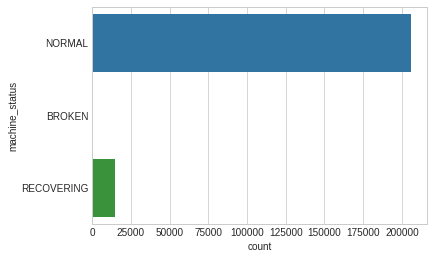

In [ ]:
# draw a countplot for machine status 
import seaborn as sns
sns.countplot(y = data['machine_status'])

In [ ]:
le=LabelEncoder()
data['machine_status']=le.fit_transform(data['machine_status'])
data['machine_status'].value_counts()
data['machine_status'].value_counts()/len(data)
#1-NORMAL 2-RECOVERED 3-BROKEN

1    0.934259
2    0.065709
0    0.000032
Name: machine_status, dtype: float64

<Figure size 3600x3600 with 0 Axes>

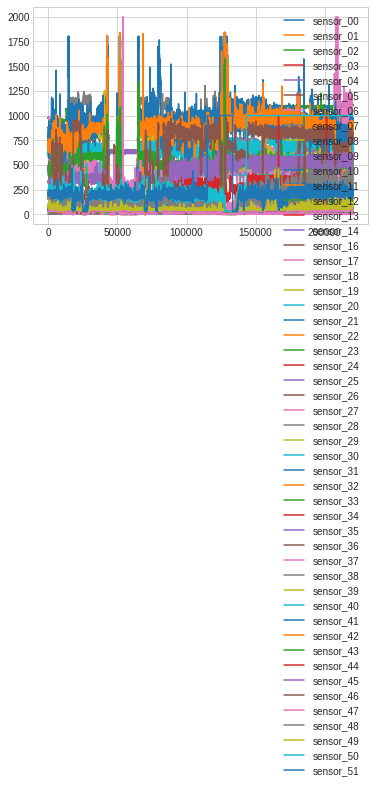

In [28]:
plt.figure(figsize=(50,50))
data.plot()
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matp

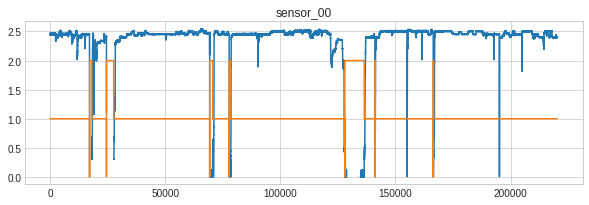

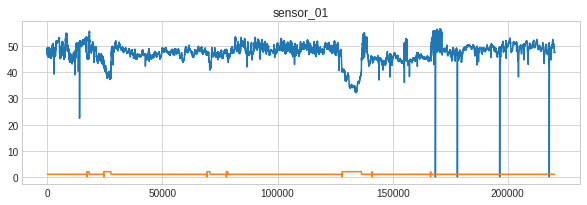

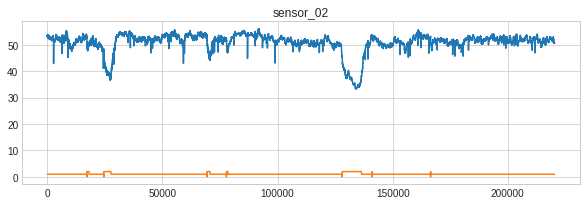

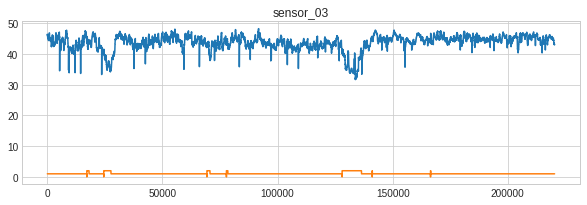

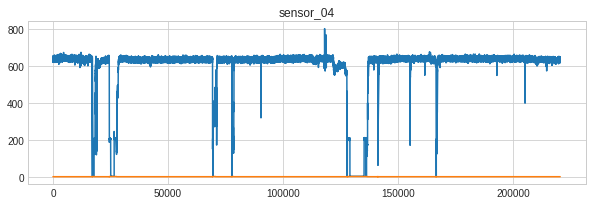

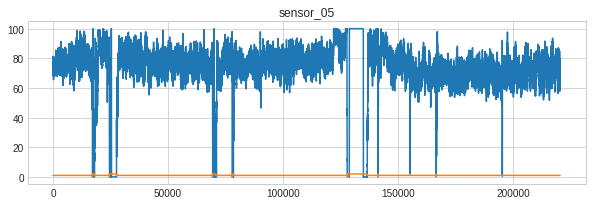

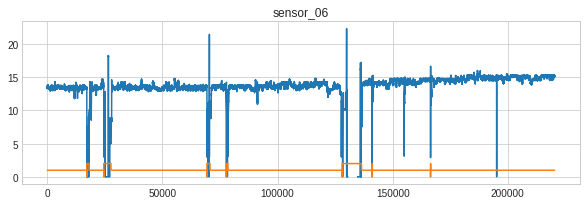

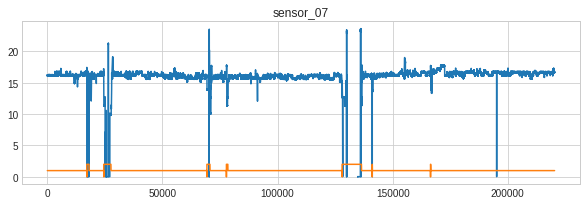

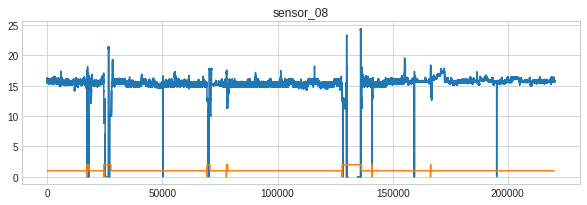

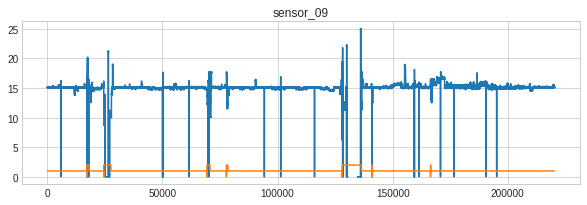

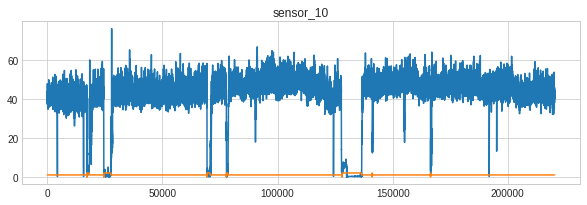

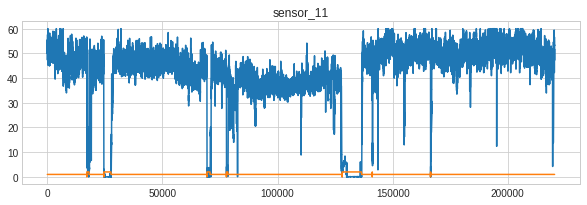

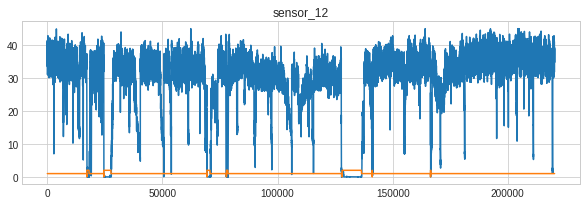

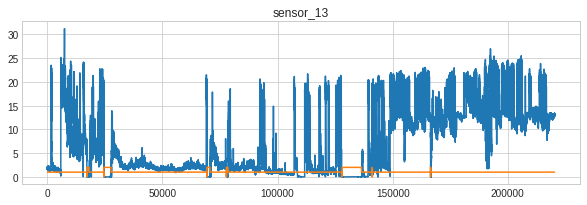

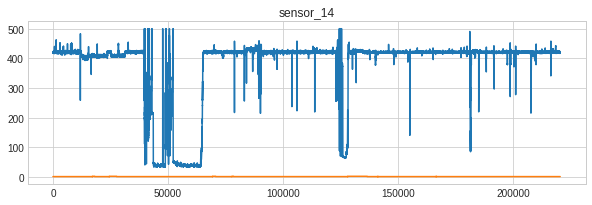

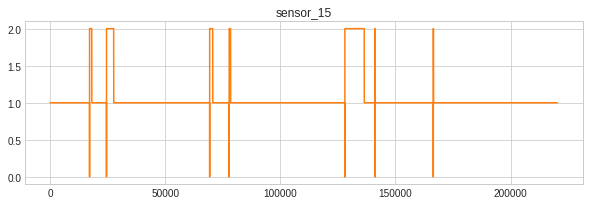

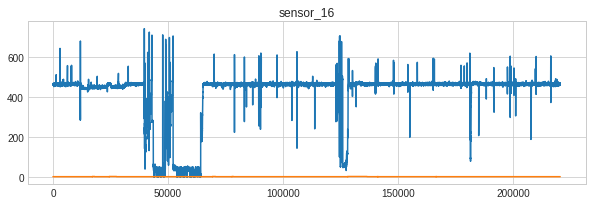

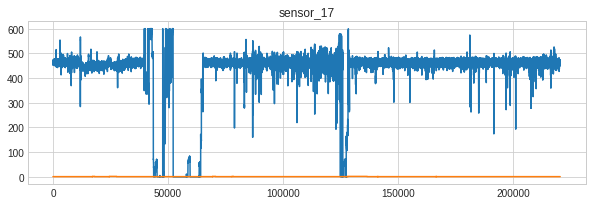

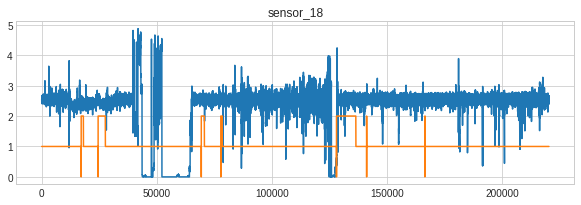

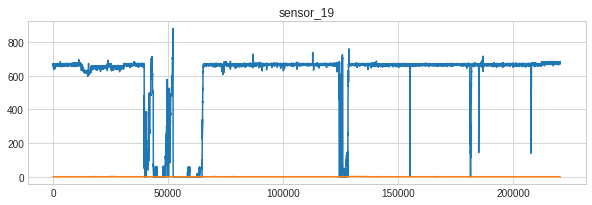

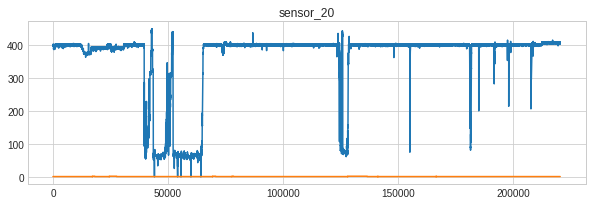

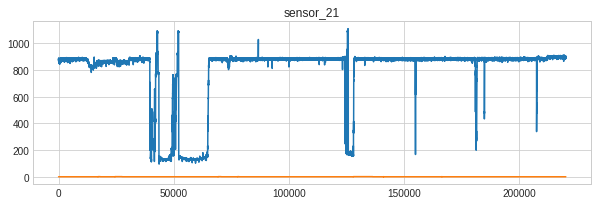

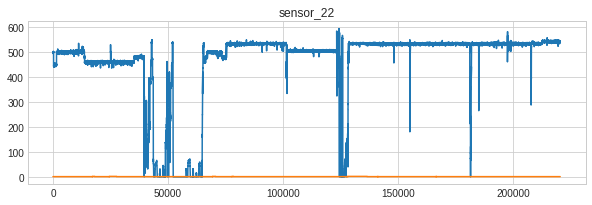

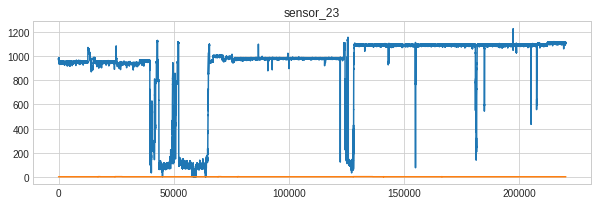

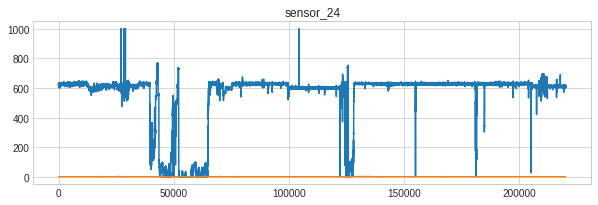

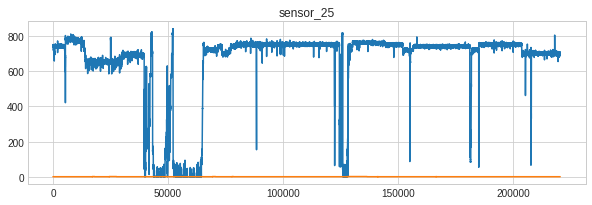

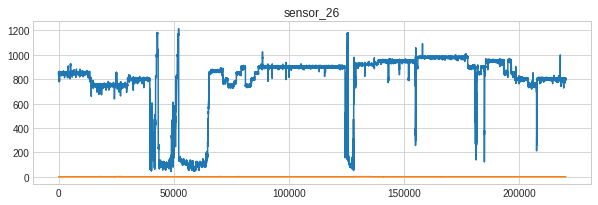

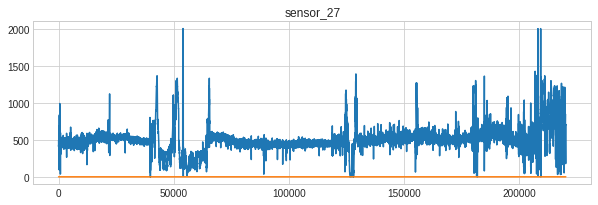

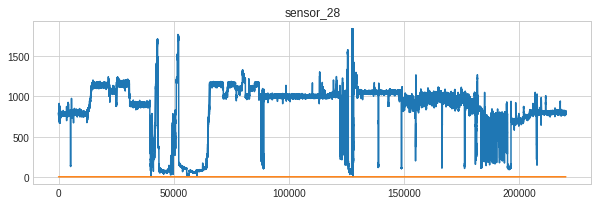

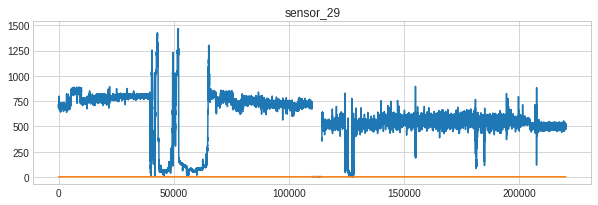

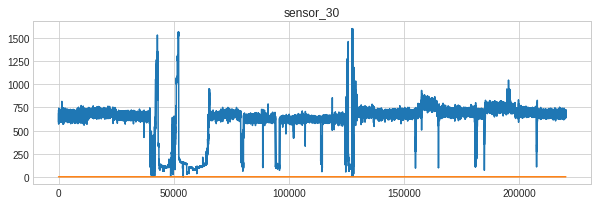

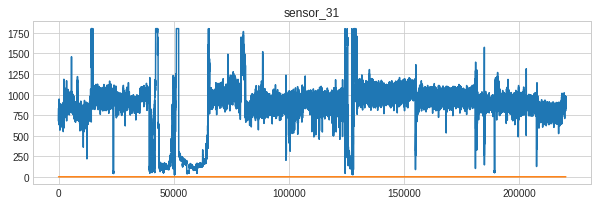

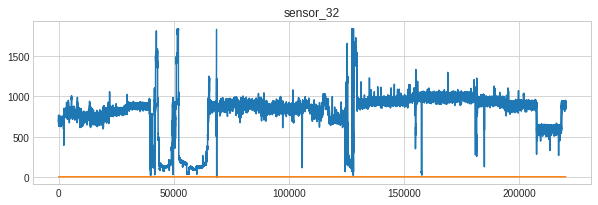

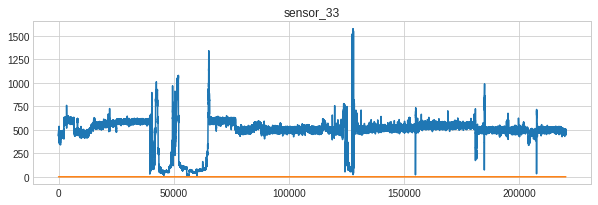

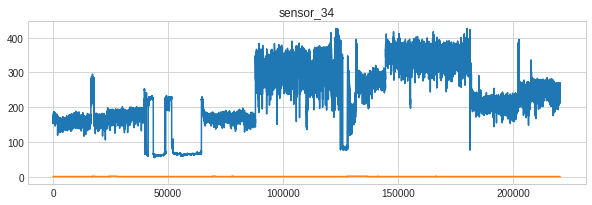

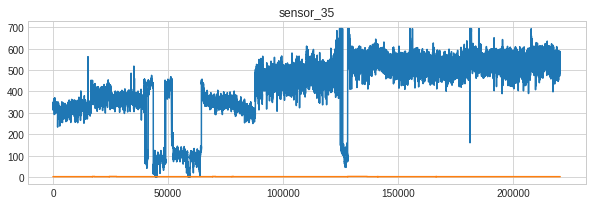

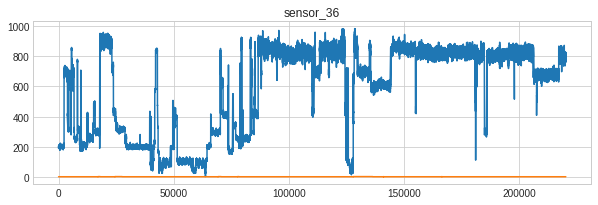

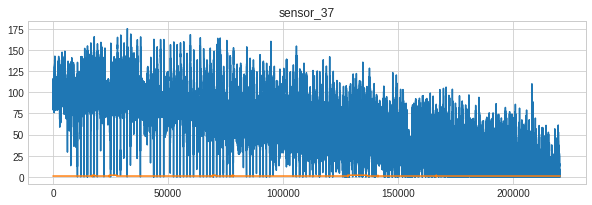

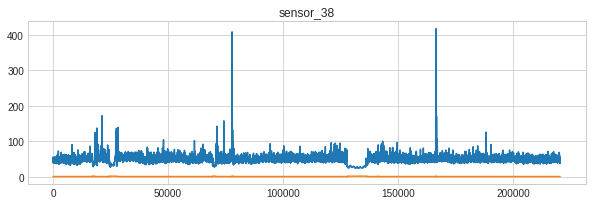

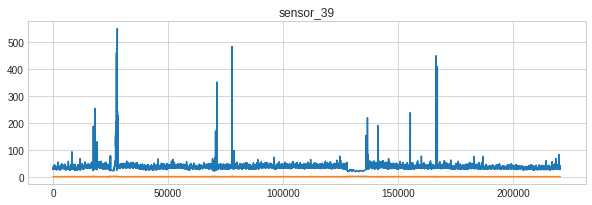

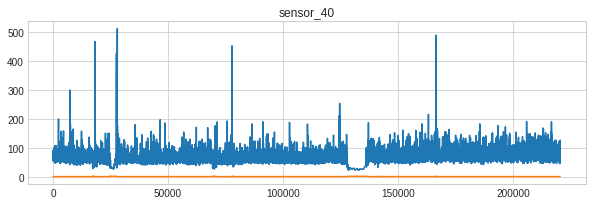

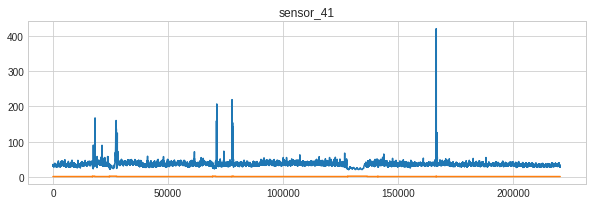

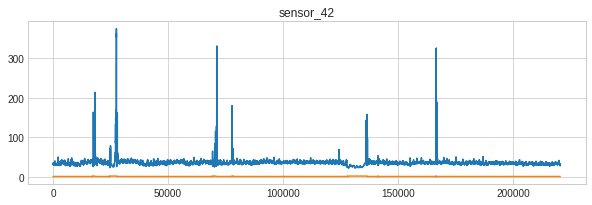

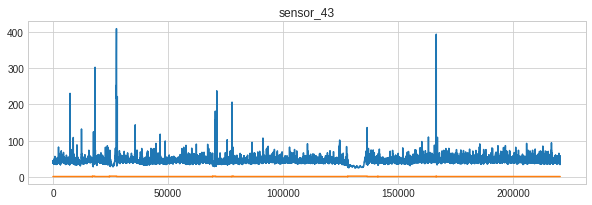

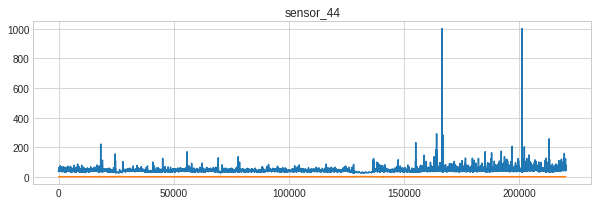

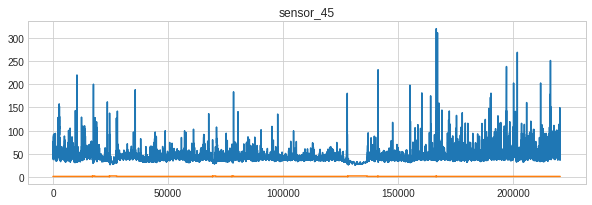

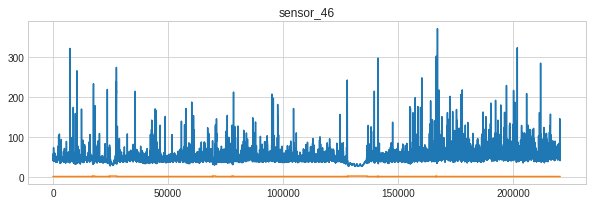

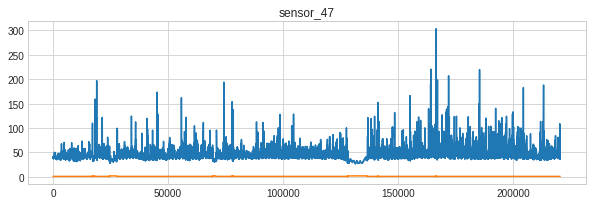

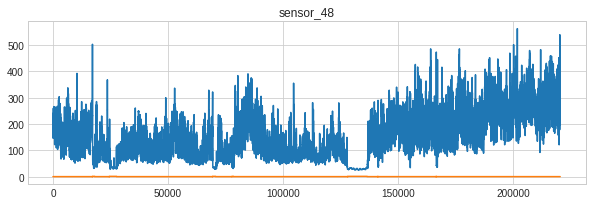

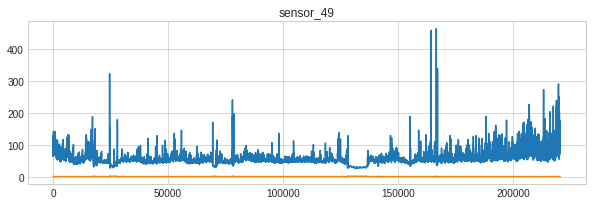

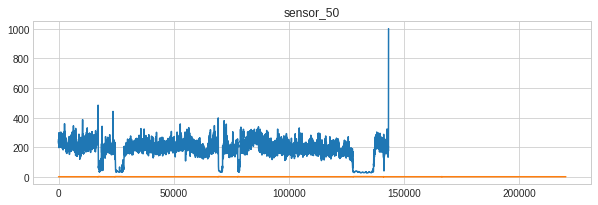

In [ ]:
columns = [col for col in data.columns if not col.find('sensor')]
for i in range(51):
    plt.figure()
    data[columns[i]].plot(figsize=(10,3))
    data['machine_status'].plot(figsize=(10,3))
    plt.title(columns[i])

In [ ]:
corr  = data.corr()

[Text(0.5, 0, 'Unnamed: 0'),
 Text(2.5, 0, 'sensor_01'),
 Text(4.5, 0, 'sensor_03'),
 Text(6.5, 0, 'sensor_05'),
 Text(8.5, 0, 'sensor_07'),
 Text(10.5, 0, 'sensor_09'),
 Text(12.5, 0, 'sensor_11'),
 Text(14.5, 0, 'sensor_13'),
 Text(16.5, 0, 'sensor_15'),
 Text(18.5, 0, 'sensor_17'),
 Text(20.5, 0, 'sensor_19'),
 Text(22.5, 0, 'sensor_21'),
 Text(24.5, 0, 'sensor_23'),
 Text(26.5, 0, 'sensor_25'),
 Text(28.5, 0, 'sensor_27'),
 Text(30.5, 0, 'sensor_29'),
 Text(32.5, 0, 'sensor_31'),
 Text(34.5, 0, 'sensor_33'),
 Text(36.5, 0, 'sensor_35'),
 Text(38.5, 0, 'sensor_37'),
 Text(40.5, 0, 'sensor_39'),
 Text(42.5, 0, 'sensor_41'),
 Text(44.5, 0, 'sensor_43'),
 Text(46.5, 0, 'sensor_45'),
 Text(48.5, 0, 'sensor_47'),
 Text(50.5, 0, 'sensor_49'),
 Text(52.5, 0, 'sensor_51')]

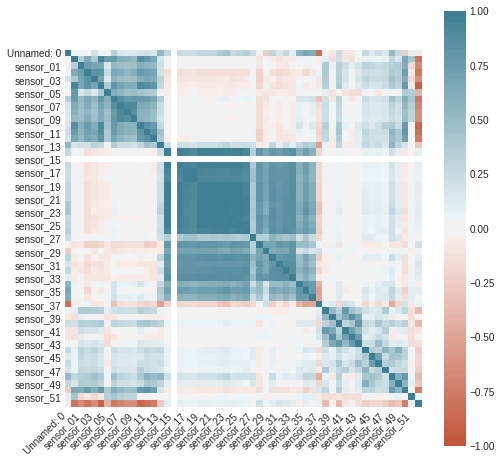

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))  
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
    
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

Based on correlation, there are three sets of clusters Basically what it means is some sensors of 0 to 14 have high correlations with each other Sensors 14 to 36 have high correlation with each other and then Sensors 38 to 41 have correlations with each other but there is not significant correlation between these clusters of Sensors

#Looking into missing values

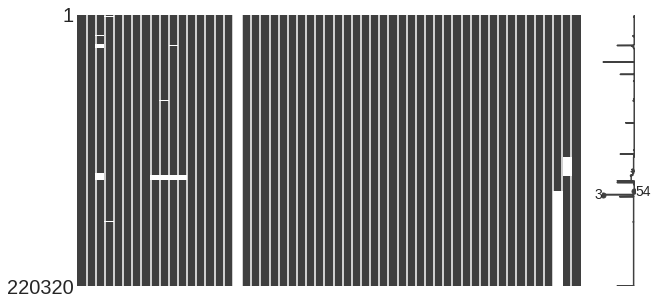

In [ ]:
missingno.matrix(data, figsize = (10,5))


In [ ]:
# Alternatively, you can see the number of missing values like this
data.isnull().sum()

Samples                0
timestamp              0
sensor_00          10208
sensor_01            369
sensor_02             19
sensor_03             19
sensor_04             19
sensor_05             19
sensor_06           4798
sensor_07           5451
sensor_08           5107
sensor_09           4595
sensor_10             19
sensor_11             19
sensor_12             19
sensor_13             19
sensor_14             21
sensor_15         220320
sensor_16             31
sensor_17             46
sensor_18             46
sensor_19             16
sensor_20             16
sensor_21             16
sensor_22             41
sensor_23             16
sensor_24             16
sensor_25             36
sensor_26             20
sensor_27             16
sensor_28             16
sensor_29             72
sensor_30            261
sensor_31             16
sensor_32             68
sensor_33             16
sensor_34             16
sensor_35             16
sensor_36             16
sensor_37             16
